# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [3]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [4]:
city1 = City(3,5)

In [5]:
city1

(3,5)

In [6]:
city2 = City(5,7)

In [7]:
city1.distance(city2)

2.8284271247461903

In [8]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [9]:
route1 = []
route1.append(city1)
route1.append(city2)

In [10]:
route1

[(3,5), (5,7)]

In [11]:
fitness1 = Fitness(route1).routeFitness()

In [12]:
fitness1

0.17677669529663687

In [13]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [14]:
route1

[(3,5), (5,7)]

In [15]:
route1.append(City(8,8))

In [20]:
route1.append(City(1,8))

In [21]:
route1

[(3,5), (5,7), (8,8), (13,7), (6,1), (22,4), (14,18), (1,8)]

In [22]:
citylist1=route1

In [23]:
citylist1

[(3,5), (5,7), (8,8), (13,7), (6,1), (22,4), (14,18), (1,8)]

In [25]:
createRoute(citylist1)

[(5,7), (3,5), (22,4), (13,7), (6,1), (14,18), (8,8), (1,8)]

In [26]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [34]:
a = initialPopulation(citylist1,6)

In [30]:
a

[[(22,4), (3,5), (5,7), (14,18), (1,8), (13,7), (8,8), (6,1)],
 [(8,8), (22,4), (14,18), (3,5), (13,7), (5,7), (1,8), (6,1)],
 [(8,8), (14,18), (13,7), (22,4), (1,8), (5,7), (6,1), (3,5)],
 [(1,8), (5,7), (22,4), (14,18), (13,7), (6,1), (8,8), (3,5)],
 [(22,4), (1,8), (5,7), (8,8), (14,18), (6,1), (3,5), (13,7)],
 [(1,8), (3,5), (5,7), (8,8), (22,4), (14,18), (13,7), (6,1)]]

In [65]:
a

[[(14,18), (5,7), (22,4), (1,8), (6,1), (13,7), (3,5), (8,8)],
 [(8,8), (1,8), (14,18), (22,4), (3,5), (13,7), (5,7), (6,1)],
 [(5,7), (6,1), (22,4), (3,5), (8,8), (1,8), (13,7), (14,18)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(13,7), (22,4), (8,8), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)]]

In [36]:
poprank = {}
for i in range(len(a)):
    fitness = Fitness(a[i]).routeFitness()
    poprank[i]=fitness



In [37]:
poprank

{0: 0.010166148447710332,
 1: 0.011097184883813045,
 2: 0.010926757456090449,
 3: 0.011296043250352534,
 4: 0.012076754986463644,
 5: 0.011211418691495922}

In [38]:

routerank = sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [39]:
routerank

[(4, 0.012076754986463644),
 (3, 0.011296043250352534),
 (5, 0.011211418691495922),
 (1, 0.011097184883813045),
 (2, 0.010926757456090449),
 (0, 0.010166148447710332)]

In [40]:
df = pd.DataFrame(routerank,columns=['Index','Fitness'])

In [41]:
df['cum_sum'] = df['Fitness'].cumsum()
df['cum_perc'] = 100*df['cum_sum']/df['Fitness'].sum()
df

,Index,Fitness,cum_sum,cum_perc
0,4,0.012077,0.012077,18.085931
1,3,0.011296,0.023373,35.002681
2,5,0.011211,0.034584,51.792700
3,1,0.011097,0.045681,68.411644
4,2,0.010927,0.056608,84.775359
5,0,0.010166,0.066774,100.000000


In [42]:
df['Fitness']

0    0.012077
1    0.011296
2    0.011211
3    0.011097
4    0.010927
5    0.010166
Name: Fitness, dtype: float64

In [43]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [44]:
rankRoutes(a)

[(4, 0.012076754986463644),
 (3, 0.011296043250352534),
 (5, 0.011211418691495922),
 (1, 0.011097184883813045),
 (2, 0.010926757456090449),
 (0, 0.010166148447710332)]

In [51]:
#roulette wheel이용해서 selection. population length만큼 선택하기.
#elitism추가
def selection(popRank,elitesize):
    selected = []
    df = pd.DataFrame(popRank,columns=['Index','Fitness'])
    df['cum_sum']=df['Fitness'].cumsum()
    df['cum_perc']=df['cum_sum']*100/df['Fitness'].sum()
    for i in range(elitesize):
        selected.append(popRank[i])
    for i in range(len(popRank)-elitesize):
        pick = random.random()*100
        for k in range(len(popRank)):
            if pick < df.iloc[k,3]:
                selected.append(popRank[k])
                break
    return selected
                
        
    

In [52]:
df.iloc[1,3]

35.00268147481172

In [53]:
df

,Index,Fitness,cum_sum,cum_perc
0,4,0.012077,0.012077,18.085931
1,3,0.011296,0.023373,35.002681
2,5,0.011211,0.034584,51.792700
3,1,0.011097,0.045681,68.411644
4,2,0.010927,0.056608,84.775359
5,0,0.010166,0.066774,100.000000


In [60]:
selc= selection(routerank,3)

In [61]:
selc

[(4, 0.012076754986463644),
 (3, 0.011296043250352534),
 (5, 0.011211418691495922),
 (3, 0.011296043250352534),
 (0, 0.010166148447710332),
 (5, 0.011211418691495922)]

In [62]:
selc[1][0]

3

In [63]:
#selection 결과 바탕으로 matingpool형성
#elitism추가
def matingpool(selected,population):
    #population에서 룰렛휠로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(selected[i][0])
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [64]:
matingpool(selc,a)

[[(13,7), (22,4), (8,8), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(14,18), (5,7), (22,4), (1,8), (6,1), (13,7), (3,5), (8,8)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)]]

In [66]:
a

[[(14,18), (5,7), (22,4), (1,8), (6,1), (13,7), (3,5), (8,8)],
 [(8,8), (1,8), (14,18), (22,4), (3,5), (13,7), (5,7), (6,1)],
 [(5,7), (6,1), (22,4), (3,5), (8,8), (1,8), (13,7), (14,18)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(13,7), (22,4), (8,8), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)]]

In [67]:
#breed...
parent1 = random.sample(a,1)
parent2 = random.sample(a,1)
abs1 = random.randint(0,len(parent1[0]))
abs2 = random.randint(0,len(parent2[0]))
child1 =[]
for i in range(min(abs1,abs2),max(abs1,abs2)):
    child1.append(parent1[0][i])
child2 = [val for val in parent2[0] if val not in child1]
Child = child1+child2

In [68]:
child1

[(14,18), (22,4)]

In [69]:
parent2

[[(8,8), (1,8), (14,18), (22,4), (3,5), (13,7), (5,7), (6,1)]]

In [70]:
child2

[(8,8), (1,8), (3,5), (13,7), (5,7), (6,1)]

In [71]:
parent1

[[(8,8), (1,8), (14,18), (22,4), (3,5), (13,7), (5,7), (6,1)]]

In [72]:
Child

[(14,18), (22,4), (8,8), (1,8), (3,5), (13,7), (5,7), (6,1)]

In [73]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [74]:
pool = matingpool(selc,a)

In [75]:
pool

[[(13,7), (22,4), (8,8), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(14,18), (5,7), (22,4), (1,8), (6,1), (13,7), (3,5), (8,8)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)]]

In [76]:
pool[1]

[(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)]

In [77]:
def breedpopulation(pool,elitesize):
    breedpop = []
    for i in range(elitesize):
        breedpop.append(pool[i])
    for i in range(len(pool)-elitesize):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [79]:
brpop = breedpopulation(pool,3)

In [80]:
brpop

[[(13,7), (22,4), (8,8), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(3,5), (22,4), (6,1), (5,7), (13,7), (8,8), (14,18), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(6,1), (13,7), (3,5), (22,4), (8,8), (14,18), (5,7), (1,8)]]

In [81]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [82]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [83]:
brpop

[[(13,7), (22,4), (8,8), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(3,5), (22,4), (6,1), (5,7), (13,7), (8,8), (14,18), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(6,1), (13,7), (3,5), (22,4), (8,8), (14,18), (5,7), (1,8)]]

In [85]:
mutatepopulation(brpop,0.3)

[[(8,8), (22,4), (13,7), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(8,8), (22,4), (6,1), (5,7), (13,7), (3,5), (14,18), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(6,1), (13,7), (3,5), (22,4), (8,8), (14,18), (5,7), (1,8)]]

In [86]:
brpop

[[(8,8), (22,4), (13,7), (6,1), (14,18), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(8,8), (22,4), (6,1), (5,7), (13,7), (3,5), (14,18), (1,8)],
 [(6,1), (14,18), (13,7), (1,8), (8,8), (22,4), (5,7), (3,5)],
 [(6,1), (13,7), (3,5), (22,4), (8,8), (14,18), (5,7), (1,8)]]

In [89]:
def nextGeneration(population,mutationrate,elitesize):
    rank = rankRoutes(population)
    selected = selection(rank,elitesize)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool,elitesize)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [95]:
nextGeneration(brpop,0.2,3)

[[(8,8), (22,4), (14,18), (6,1), (13,7), (5,7), (3,5), (1,8)],
 [(6,1), (14,18), (5,7), (1,8), (8,8), (22,4), (13,7), (3,5)],
 [(8,8), (1,8), (14,18), (13,7), (3,5), (22,4), (6,1), (5,7)],
 [(8,8), (22,4), (14,18), (6,1), (13,7), (5,7), (3,5), (1,8)],
 [(6,1), (13,7), (5,7), (3,5), (8,8), (22,4), (14,18), (1,8)],
 [(13,7), (1,8), (8,8), (22,4), (5,7), (6,1), (3,5), (14,18)]]

In [102]:
def GeneticAlgorithm(cityList,popSize,mutationrate,elitesize,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,mutationrate,elitesize)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    return bestroute

In [97]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [98]:
cityList

[(88,99),
 (45,49),
 (84,27),
 (1,27),
 (3,76),
 (62,48),
 (7,40),
 (15,61),
 (7,22),
 (44,95),
 (5,30),
 (35,81),
 (53,55),
 (95,17),
 (78,29),
 (89,62),
 (23,55),
 (27,51),
 (65,19),
 (77,35),
 (24,3),
 (42,48),
 (55,0),
 (26,83),
 (49,80),
 (37,58),
 (79,89),
 (58,74),
 (85,3),
 (70,73),
 (78,43),
 (55,38),
 (44,98),
 (68,57),
 (16,43)]

First Distance :1535.0268191200187
Final Distance :545.2290151434154
Time :24.447136640548706


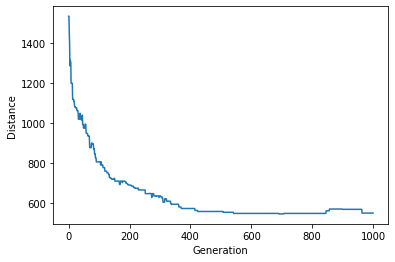

[(58,74),
 (49,80),
 (35,81),
 (26,83),
 (44,98),
 (44,95),
 (70,73),
 (79,89),
 (88,99),
 (89,62),
 (78,43),
 (77,35),
 (78,29),
 (7,40),
 (95,17),
 (85,3),
 (65,19),
 (55,0),
 (24,3),
 (7,22),
 (1,27),
 (5,30),
 (84,27),
 (16,43),
 (3,76),
 (15,61),
 (23,55),
 (27,51),
 (37,58),
 (53,55),
 (45,49),
 (42,48),
 (55,38),
 (62,48),
 (68,57)]

In [103]:
GeneticAlgorithm(cityList,50,0.1,10,1000)

In [105]:
inipop = initialPopulation(cityList,10)

In [106]:
inipop

[[(12,0),
  (45,85),
  (10,44),
  (80,88),
  (97,59),
  (13,40),
  (18,64),
  (46,83),
  (33,21),
  (12,82),
  (58,9),
  (89,58),
  (95,41),
  (76,6),
  (42,61)],
 [(42,61),
  (13,40),
  (46,83),
  (10,44),
  (12,0),
  (97,59),
  (12,82),
  (18,64),
  (89,58),
  (76,6),
  (58,9),
  (95,41),
  (45,85),
  (80,88),
  (33,21)],
 [(97,59),
  (80,88),
  (12,0),
  (12,82),
  (42,61),
  (89,58),
  (18,64),
  (45,85),
  (58,9),
  (13,40),
  (10,44),
  (95,41),
  (76,6),
  (46,83),
  (33,21)],
 [(12,82),
  (42,61),
  (12,0),
  (18,64),
  (33,21),
  (80,88),
  (89,58),
  (58,9),
  (45,85),
  (10,44),
  (76,6),
  (95,41),
  (97,59),
  (46,83),
  (13,40)],
 [(13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (89,58),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (12,82),
  (42,61),
  (18,64),
  (58,9),
  (46,83)],
 [(58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (46,83),
  (45,85),
  (76,6)],
 [(13,40),
  (97,59),


In [107]:
ranks=rankRoutes(inipop)

In [108]:
ranks

[(3, 0.0012449442932391693),
 (1, 0.0012281656026725634),
 (4, 0.0012264579535486407),
 (6, 0.0011642823815401512),
 (0, 0.0011514381312685072),
 (5, 0.0011421518294229673),
 (8, 0.0011219091069352505),
 (2, 0.0011135318248058717),
 (7, 0.0010544291402964268),
 (9, 0.0010413301164974465)]

In [115]:
selected = selection(ranks)

In [116]:
selected

[(5, 0.0011421518294229673),
 (8, 0.0011219091069352505),
 (9, 0.0010413301164974465),
 (7, 0.0010544291402964268),
 (6, 0.0011642823815401512),
 (4, 0.0012264579535486407),
 (2, 0.0011135318248058717),
 (5, 0.0011421518294229673),
 (1, 0.0012281656026725634),
 (4, 0.0012264579535486407)]

In [117]:
matpool= matingpool(selected,inipop)

In [118]:
matpool

[[(58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (46,83),
  (45,85),
  (76,6)],
 [(12,0),
  (95,41),
  (45,85),
  (97,59),
  (33,21),
  (58,9),
  (10,44),
  (12,82),
  (76,6),
  (80,88),
  (89,58),
  (13,40),
  (42,61),
  (18,64),
  (46,83)],
 [(76,6),
  (58,9),
  (46,83),
  (89,58),
  (10,44),
  (95,41),
  (12,82),
  (12,0),
  (18,64),
  (97,59),
  (45,85),
  (13,40),
  (33,21),
  (80,88),
  (42,61)],
 [(45,85),
  (18,64),
  (97,59),
  (10,44),
  (89,58),
  (13,40),
  (58,9),
  (12,82),
  (80,88),
  (95,41),
  (46,83),
  (33,21),
  (76,6),
  (12,0),
  (42,61)],
 [(13,40),
  (97,59),
  (45,85),
  (46,83),
  (76,6),
  (89,58),
  (33,21),
  (12,0),
  (10,44),
  (95,41),
  (12,82),
  (18,64),
  (80,88),
  (58,9),
  (42,61)],
 [(13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (89,58),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (12,82),
  (42,61),
  (18,64),
  (58,9),
  (46,83)],
 [(97,59),
  (80,88),


In [119]:
bredpop = breedpopulation(matpool)

In [120]:
bredpop

[[(89,58),
  (33,21),
  (12,0),
  (10,44),
  (95,41),
  (12,82),
  (13,40),
  (80,88),
  (45,85),
  (76,6),
  (97,59),
  (42,61),
  (18,64),
  (58,9),
  (46,83)],
 [(80,88),
  (97,59),
  (12,0),
  (12,82),
  (42,61),
  (89,58),
  (18,64),
  (45,85),
  (58,9),
  (13,40),
  (10,44),
  (95,41),
  (76,6),
  (46,83),
  (33,21)],
 [(12,82),
  (42,61),
  (89,58),
  (18,64),
  (13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (58,9),
  (46,83)],
 [(12,82),
  (18,64),
  (80,88),
  (42,61),
  (13,40),
  (46,83),
  (10,44),
  (12,0),
  (97,59),
  (89,58),
  (76,6),
  (58,9),
  (95,41),
  (45,85),
  (33,21)],
 [(46,83),
  (58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (45,85),
  (76,6)],
 [(58,9),
  (76,6),
  (46,83),
  (89,58),
  (10,44),
  (95,41),
  (12,82),
  (12,0),
  (18,64),
  (97,59),
  (45,85),
  (13,40),
  (33,21),
  (80,88),
  (42,61)],
 [(76,6),
  (97,59),
 

In [121]:
mutpop = mutatepopulation(bredpop,0.1)

In [122]:
mutpop

[[(89,58),
  (33,21),
  (12,0),
  (10,44),
  (95,41),
  (12,82),
  (13,40),
  (80,88),
  (45,85),
  (76,6),
  (97,59),
  (46,83),
  (18,64),
  (58,9),
  (42,61)],
 [(80,88),
  (97,59),
  (12,0),
  (12,82),
  (42,61),
  (89,58),
  (18,64),
  (45,85),
  (58,9),
  (13,40),
  (10,44),
  (95,41),
  (76,6),
  (46,83),
  (33,21)],
 [(12,82),
  (42,61),
  (89,58),
  (18,64),
  (13,40),
  (80,88),
  (45,85),
  (12,0),
  (33,21),
  (76,6),
  (97,59),
  (95,41),
  (10,44),
  (58,9),
  (46,83)],
 [(12,82),
  (18,64),
  (80,88),
  (42,61),
  (13,40),
  (46,83),
  (10,44),
  (12,0),
  (97,59),
  (89,58),
  (76,6),
  (58,9),
  (95,41),
  (45,85),
  (33,21)],
 [(46,83),
  (58,9),
  (89,58),
  (13,40),
  (95,41),
  (12,82),
  (12,0),
  (97,59),
  (33,21),
  (42,61),
  (10,44),
  (18,64),
  (80,88),
  (45,85),
  (76,6)],
 [(58,9),
  (76,6),
  (46,83),
  (89,58),
  (10,44),
  (95,41),
  (12,82),
  (12,0),
  (18,64),
  (97,59),
  (45,85),
  (13,40),
  (33,21),
  (80,88),
  (42,61)],
 [(76,6),
  (97,59),
 